In [1]:
import numpy as np
import os
import time 
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.axes_grid1 import ImageGrid

In [2]:
SQUARE_SIZE = 30
BOARD_SIZE = (11, 7)

In [3]:
LEFT_PATH = r"C:\Users\harsh\Downloads\data\imgs\leftcamera"
RIGHT_PATH = r"C:\Users\harsh\Downloads\data\imgs\rightcamera"

print('We have {} images from left camera'.format(len(os.listdir(LEFT_PATH))));
print('We have {} images from right camera'.format(len(os.listdir(RIGHT_PATH))))

We have 20 images from left camera
We have 20 images from right camera


In [4]:

"""
 Stereo calibration requires that each left–right image pair corresponds
 to the same chessboard pose (taken at the same instant).
 
 Therefore, we must ensure left1 <-> right1, left2 <-> right2, ...,
 i.e., Left[i] matches Right[i].
 
 Sorting is used only to guarantee consistent pairing (so filenames
 like 1.png, 2.png, 10.png don’t get mismatched alphabetically).
 
 This way, the world coordinates of the chessboard corners remain
 consistent between both cameras, allowing correct stereo calibration.
"""
print('Before: {}, {}, {}, ...'.format(os.listdir(LEFT_PATH)[0], os.listdir(LEFT_PATH)[1], os.listdir(LEFT_PATH)[2]))

def SortImageNames(path):
    imagelist = sorted(os.listdir(path))
    lengths = []
    for name in imagelist:
        lengths.append(len(name))
    lengths = sorted(list(set(lengths)))
    ImageNames, ImageNamesRaw = [], []
    for l in lengths:
        for name in imagelist:
            if len(name) == l:
                ImageNames.append(os.path.join(path, name))
                ImageNamesRaw.append(name)
    return ImageNames
                
Left_Paths = SortImageNames(LEFT_PATH)
Right_Paths = SortImageNames(RIGHT_PATH)

print('After: {}, {}, {}, ...'.format(os.path.basename(Left_Paths[0]), os.path.basename(Left_Paths[1]), os.path.basename(Left_Paths[2])))

"""
Verify if both Left and Right have same number of images and (l1<->r1, l2<->r2, .....)
"""
def VerifyPairs(left_paths, right_paths):
    # Extract numeric indices from filenames
    left_ids  = [int(os.path.splitext(os.path.basename(p))[0].split('_')[-1]) for p in left_paths]
    right_ids = [int(os.path.splitext(os.path.basename(p))[0].split('_')[-1]) for p in right_paths]

    # Compare IDs
    if left_ids != right_ids:
        missing_left  = set(right_ids) - set(left_ids)
        missing_right = set(left_ids) - set(right_ids)
        raise ValueError(
            f"   Mismatch in image pairs!\n"
            f"   Missing in LEFT: {sorted(missing_left)}\n"
            f"   Missing in RIGHT: {sorted(missing_right)}"
        )
    else:
        print("Left and Right image pairs verified — all indices match!")

VerifyPairs(Left_Paths, Right_Paths)

Before: Im_L_1.png, Im_L_10.png, Im_L_11.png, ...
After: Im_L_1.png, Im_L_2.png, Im_L_3.png, ...
Left and Right image pairs verified — all indices match!


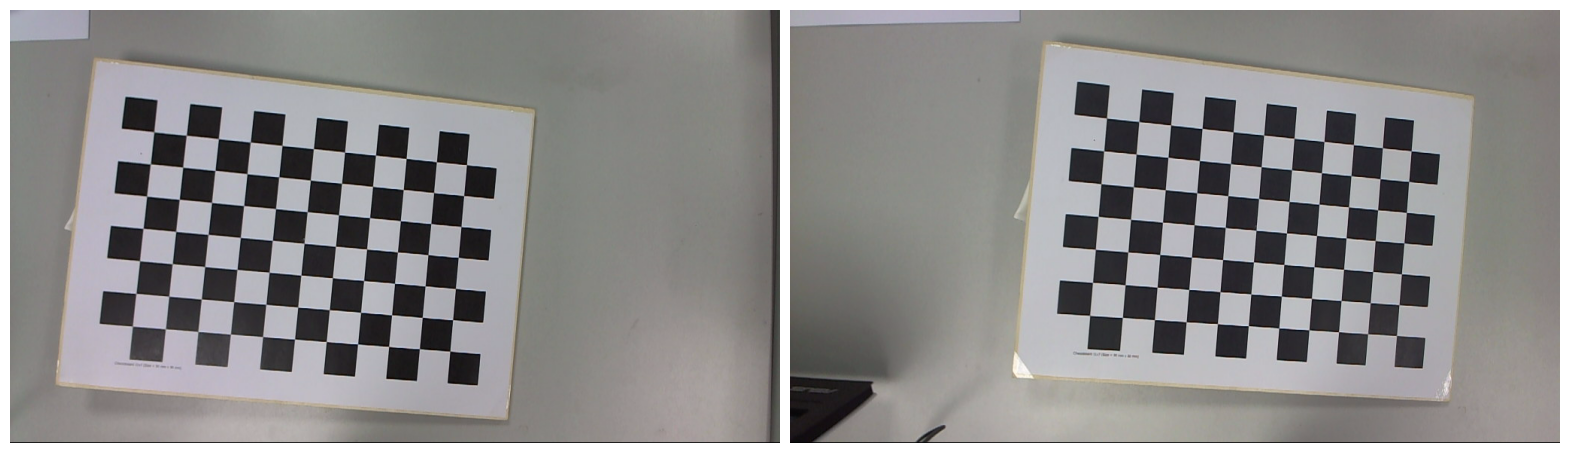

In [5]:
# Showing example of left and right pair
fig = plt.figure(figsize=(20, 20))
grid = ImageGrid(fig, 111, nrows_ncols = (1,2), axes_pad=0.1)

for ax, im in zip(grid, [Left_Paths[12], Right_Paths[12]]):
    ax.imshow(plt.imread(im))
    ax.axis('off')

In [6]:
# we need to check if we have the correct Board Size

example_image =  cv2.imread(Left_Paths[5])
example_image = cv2.cvtColor(example_image, cv2.COLOR_BGR2GRAY)

ret, _ = cv2.findChessboardCorners(example_image, BOARD_SIZE)
if ret:
    print('Board size {} is correct.'.format(BOARD_SIZE))
else:
    print('[ERROR] the Board Size is not correct!')
    BOARD_SIZE = (0, 0)

Board size (11, 7) is correct.


DETECT THE CHESSBOOARD CORNERS

In [7]:
"""
We have to create the objectPoints that are the local 2D-points on the pattern,
corresponding to the local coordinate system on the top left corner (World coordinate frame)
"""
# BOARD SIZE = (11, 7)

objpoints = np.zeros((BOARD_SIZE[0]*BOARD_SIZE[1], 3), np.float32) #-> create 11*3 rows with 3 cols for (X, Y, Z)
objpoints[:, :2] = np.mgrid[0:BOARD_SIZE[0], 0:BOARD_SIZE[1]].T.reshape(-1, 2) 
objpoints *= SQUARE_SIZE #-> each square in board is SQUARE_SIZE (30mm) long

print(objpoints)

[[  0.   0.   0.]
 [ 30.   0.   0.]
 [ 60.   0.   0.]
 [ 90.   0.   0.]
 [120.   0.   0.]
 [150.   0.   0.]
 [180.   0.   0.]
 [210.   0.   0.]
 [240.   0.   0.]
 [270.   0.   0.]
 [300.   0.   0.]
 [  0.  30.   0.]
 [ 30.  30.   0.]
 [ 60.  30.   0.]
 [ 90.  30.   0.]
 [120.  30.   0.]
 [150.  30.   0.]
 [180.  30.   0.]
 [210.  30.   0.]
 [240.  30.   0.]
 [270.  30.   0.]
 [300.  30.   0.]
 [  0.  60.   0.]
 [ 30.  60.   0.]
 [ 60.  60.   0.]
 [ 90.  60.   0.]
 [120.  60.   0.]
 [150.  60.   0.]
 [180.  60.   0.]
 [210.  60.   0.]
 [240.  60.   0.]
 [270.  60.   0.]
 [300.  60.   0.]
 [  0.  90.   0.]
 [ 30.  90.   0.]
 [ 60.  90.   0.]
 [ 90.  90.   0.]
 [120.  90.   0.]
 [150.  90.   0.]
 [180.  90.   0.]
 [210.  90.   0.]
 [240.  90.   0.]
 [270.  90.   0.]
 [300.  90.   0.]
 [  0. 120.   0.]
 [ 30. 120.   0.]
 [ 60. 120.   0.]
 [ 90. 120.   0.]
 [120. 120.   0.]
 [150. 120.   0.]
 [180. 120.   0.]
 [210. 120.   0.]
 [240. 120.   0.]
 [270. 120.   0.]
 [300. 120.   0.]
 [  0. 150

In [8]:
"""
Now we need to find image coordinates of the world coordinate we found above
"""

def GenerateImagepoints(paths):
    # Max iterations reached → 30 iterations
    # Desired accuracy achieved → movement of corner estimate is less than 0.001 pixels between iterations
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
    imgpoints = []
    for name in paths:
        img = cv2.imread(name)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # (ret, corners1) ->(if_corners_found, approx_pos_corners)
        ret, corners1 = cv2.findChessboardCorners(img, BOARD_SIZE)
        if ret:
            # refining the approx_pos_corners to subpixel level by taking (4,4) window size
            corners2 = cv2.cornerSubPix(gray, corners1, (4,4), (-1,-1), criteria)
            imgpoints.append(corners2)
    return imgpoints

Left_imgpoints = GenerateImagepoints(Left_Paths)
Right_imgpoints = GenerateImagepoints(Right_Paths)

print(len(Left_imgpoints))  # number of images with detected corners

for i, pts in enumerate(Left_imgpoints):
    print(f"Image {i}: {pts.shape}")
    # for each image it detected 77 corners with 2 coordinates (u, v) so (77 , 1, 2)


20
Image 0: (77, 1, 2)
Image 1: (77, 1, 2)
Image 2: (77, 1, 2)
Image 3: (77, 1, 2)
Image 4: (77, 1, 2)
Image 5: (77, 1, 2)
Image 6: (77, 1, 2)
Image 7: (77, 1, 2)
Image 8: (77, 1, 2)
Image 9: (77, 1, 2)
Image 10: (77, 1, 2)
Image 11: (77, 1, 2)
Image 12: (77, 1, 2)
Image 13: (77, 1, 2)
Image 14: (77, 1, 2)
Image 15: (77, 1, 2)
Image 16: (77, 1, 2)
Image 17: (77, 1, 2)
Image 18: (77, 1, 2)
Image 19: (77, 1, 2)


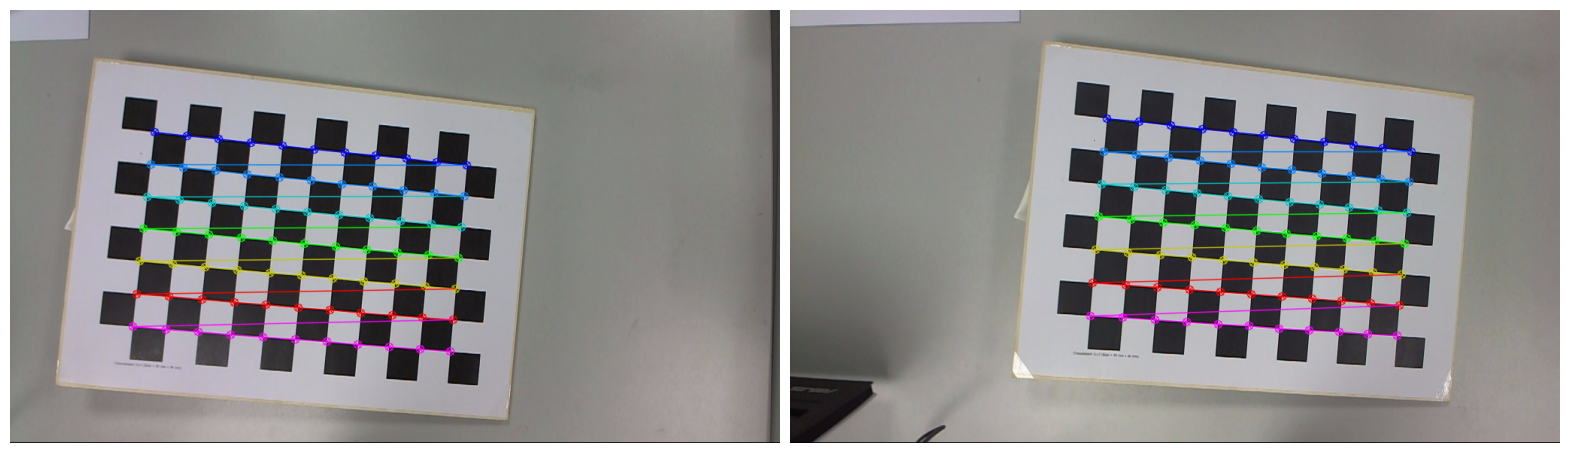

In [9]:
"""We can also display the imagepoints on the example pictures"""

def DisplayImagePoints(path, imgpoints):
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.drawChessboardCorners(img, BOARD_SIZE, imgpoints, True)
    return img

example_image_left = DisplayImagePoints(Left_Paths[12], Left_imgpoints[12])
example_image_right = DisplayImagePoints(Right_Paths[12], Right_imgpoints[12])

fig = plt.figure(figsize=(20, 20))
grid = ImageGrid(fig, 111, nrows_ncols=(1, 2), axes_pad=0.1)

for ax, im in zip(grid, [example_image_left, example_image_right]):
    ax.imshow(im)
    ax.axis('off')


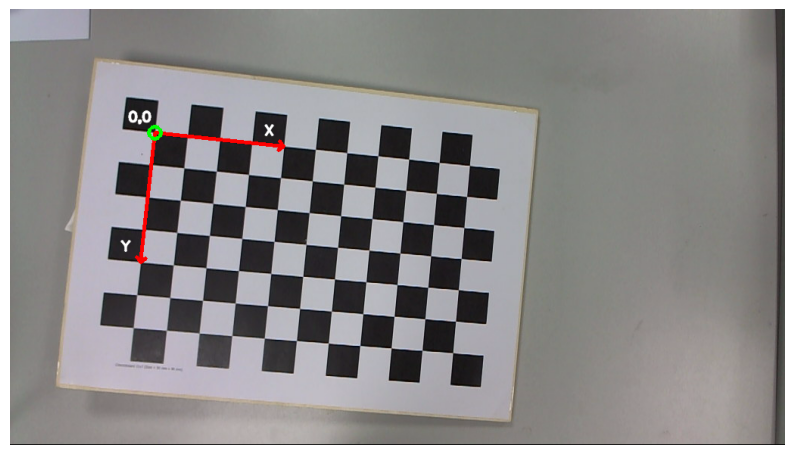

In [10]:
"""Let's visualise world coordinate frame"""

def PlotLocalCoordinates(img, points):
    points = np.int32(points)
    cv2.arrowedLine(img, tuple(points[0,0]), tuple(points[4,0]), (255,0,0), 3, tipLength=0.05)
    cv2.arrowedLine(img, tuple(points[0,0]), tuple(points[BOARD_SIZE[0]*4,0]), (255,0,0), 3, tipLength=0.05)
    cv2.circle(img, tuple(points[0,0]), 8, (0,255,0), 3)
    cv2.putText(img, '0,0', (points[0,0,0]-35, points[0,0,1]-15), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255,255,255), 2, cv2.LINE_AA)
    cv2.putText(img, 'X', (points[4,0,0]-25, points[4,0,1]-15), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255,255,255), 2, cv2.LINE_AA)
    cv2.putText(img, 'Y', (points[BOARD_SIZE[0]*4,0,0]-25, points[BOARD_SIZE[0]*4,0,1]-15), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255,255,255), 2, cv2.LINE_AA)
    return img

n = 12
img = cv2.imread(Left_Paths[n])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = PlotLocalCoordinates(img, Left_imgpoints[n])

fig = plt.figure(figsize=(10,10))
plt.imshow(img)
plt.axis('off')
plt.show()

CAMERA CALIBRATION

In [11]:
Start_Time_Cal = time.perf_counter()

In [12]:
def CalibrateCamera(paths, imgpoints, objpoints):
    CameraParams = {}
    
    gray = cv2.cvtColor(cv2.imread(Left_Paths[0]), cv2.COLOR_BGR2GRAY)
    g = gray.shape[::-1]
    
    flags = 0
    
    objp = []
    for i in range(20):
        objp.append(objpoints)
    (ret, mtx, dist, rvecs, tvecs) = cv2.calibrateCamera(objp, imgpoints, g, None, None, flags=flags)
    
    Rmtx = []; Tmtx = []; k = 0
    for r in rvecs: 
        Rmtx.append(cv2.Rodrigues(r)[0])
        Tmtx.append(np.vstack((np.hstack((Rmtx[k],tvecs[k])),np.array([0,0,0,1]))))
        k += 1
        
    img = cv2.imread(Left_Paths[0],0)
    h,w = img.shape[:2]
    newmtx, roi = cv2.getOptimalNewCameraMatrix(mtx,dist,(w,h),1,(w,h))

    if np.sum(roi) == 0:
        roi = (0,0,w-1,h-1)
        
    CameraParams['Intrinsic'] = mtx
    CameraParams['Distortion'] = dist
    CameraParams['DistortionROI'] = roi
    CameraParams['DistortionIntrinsic'] = newmtx
    CameraParams['RotVektor'] = rvecs
    CameraParams['RotMatrix'] = Rmtx
    CameraParams['Extrinsics'] = Tmtx
    CameraParams['TransVektor'] = tvecs
    
    return CameraParams

In [13]:
Left_Params = CalibrateCamera(Left_Paths, Left_imgpoints, objpoints)
Right_Params = CalibrateCamera(Right_Paths, Right_imgpoints, objpoints)

In [14]:
""" Parameters for LEFT CAMERA """

print("************************* Parameters for LEFT CAMERA *************************\n")
np.set_printoptions(suppress=True, precision=5)
print('Intrinsic Matrix:')
print(Left_Params['Intrinsic'])
print('\nDistortion Parameters [k1, k2, p1, p2, k3] : ')
print(Left_Params['Distortion'])
print('\nExtrinsic Matrix from 1.Image:')
print(Left_Params['Extrinsics'][0])

************************* Parameters for LEFT CAMERA *************************

Intrinsic Matrix:
[[717.67713   0.      524.328  ]
 [  0.      728.74458 285.48227]
 [  0.        0.        1.     ]]

Distortion Parameters [k1, k2, p1, p2, k3] : 
[[ 0.03202 -0.17514  0.0009   0.00049  0.19902]]

Extrinsic Matrix from 1.Image:
[[   0.99975   -0.02139    0.00673 -274.73083]
 [   0.02112    0.99904    0.03826 -120.77909]
 [  -0.00754   -0.03811    0.99925  541.73051]
 [   0.         0.         0.         1.     ]]


In [15]:
""" Parameters for RIGHT CAMERA """

print("************************* Parameters for RIGHT CAMERA *************************\n")
np.set_printoptions(suppress=True, precision=5)
print('Intrinsic Matrix:')
print(Right_Params['Intrinsic'])
print('\nDistortion Parameters [k1, k2, p1, p2, k3] :')
print(Right_Params['Distortion'])
print('\nExtrinsic Matrix from 1.Image:')
print(Right_Params['Extrinsics'][0])

************************* Parameters for RIGHT CAMERA *************************

Intrinsic Matrix:
[[721.88058   0.      513.97876]
 [  0.      732.52239 293.09504]
 [  0.        0.        1.     ]]

Distortion Parameters [k1, k2, p1, p2, k3] :
[[ 0.00878 -0.12596 -0.00144  0.00143  0.18403]]

Extrinsic Matrix from 1.Image:
[[   0.99954   -0.01275   -0.02737 -104.4947 ]
 [   0.01296    0.99989    0.00745 -137.46415]
 [   0.02727   -0.0078     0.9996   533.31425]
 [   0.         0.         0.         1.     ]]


In [16]:
def CalculateErrors(params, imgpoints, objpoints):
    imgp = np.array(imgpoints)
    imgp = imgp.reshape((imgp.shape[0], imgp.shape[1], imgp.shape[3]))
    objp = np.array(objpoints)
    K = np.array(params['Intrinsic'])
    D = np.array(params['Distortion'])
    R = np.array(params['RotVektor'])
    T = np.array(params['TransVektor'])
    N = imgp.shape[0]
    
    print(imgp.shape)

    imgpNew = []
    for i in range(N):
        temp, _ = cv2.projectPoints(objp, R[i], T[i], K, D)
        imgpNew.append(temp.reshape((temp.shape[0], temp.shape[2])))
    imgpNew = np.array(imgpNew)
    
    err = []
    for i in range(N):
        err.append(imgp[i] - imgpNew[i])
    err = np.array(err)
    
    def RMSE(err):
        return np.sqrt(np.mean(np.sum(err**2, axis=1)))

    errall = np.copy(err[0])
    rmsePerView = [RMSE(err[0])]
    for i in range(1,N):
        errall = np.vstack((errall, err[i]))
        rmsePerView.append(RMSE(err[i]))

    rmseAll = RMSE(errall)
    return rmsePerView, rmseAll

In [17]:
Left_Errors, Left_MeanError = CalculateErrors(Left_Params, Left_imgpoints, objpoints)
Right_Errors, Right_MeanError = CalculateErrors(Right_Params, Right_imgpoints, objpoints)

print('Reprojection Error Left:  {:.4f}'.format(Left_MeanError))
print('Reprojection Error Right: {:.4f}'.format(Right_MeanError))

(20, 77, 2)
(20, 77, 2)
Reprojection Error Left:  0.1914
Reprojection Error Right: 0.2033


In [23]:
Left_Params['Imgpoints'] = Left_imgpoints
Left_Params['Errors'] = Left_Errors
Left_Params['MeanError'] = Left_MeanError

Right_Params['Imgpoints'] = Right_imgpoints
Right_Params['Errors'] = Right_Errors
Right_Params['MeanError'] = Right_MeanError

In [24]:
def StereoCalibration(leftparams, rightparams, objpoints, imgpL, imgpR, Left_Paths, Right_Paths):
    StereoParams = {}
    
    k1 = leftparams['Intrinsic']
    d1 = leftparams['Distortion']
    k2 = rightparams['Intrinsic']
    d2 = rightparams['Distortion']
    gray = cv2.imread(Left_Paths[0], 0)
    g = gray.shape[::-1]
    
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 1e-5)
    flags = 0
    flags |= cv2.CALIB_FIX_INTRINSIC
    
    objp = []
    for i in range(20):
        objp.append(objpoints)
    
    (ret, K1, D1, K2, D2, R, t, E, F) = cv2.stereoCalibrate(objp, imgpL, imgpR, k1, d1, k2, d2, g, criteria=criteria, flags=flags)
    
    T = np.vstack((np.hstack((R,t)),np.array([0,0,0,1])))
    
    StereoParams['Transformation'] = T
    StereoParams['Essential'] = E
    StereoParams['Fundamental'] = F
    StereoParams['MeanError'] = ret
    return StereoParams

In [25]:
Stereo_Params = StereoCalibration(Left_Params, Right_Params, objpoints, Left_imgpoints, Right_imgpoints, Left_Paths, Right_Paths)

In [26]:
print('Transformation Matrix:')
print(Stereo_Params['Transformation'])
print('\nEssential Matrix:')
print(Stereo_Params['Essential'])
print('\nFundamental Matrix:')
print(Stereo_Params['Fundamental'])
print('\nMean Reprojection Error:')
print('{:.6f}'.format(Stereo_Params['MeanError']))

Transformation Matrix:
[[  0.99937   0.00764  -0.03461 189.73626]
 [ -0.00857   0.9996   -0.02685  -4.5265 ]
 [  0.03439   0.02713   0.99904   4.79117]
 [  0.        0.        0.        1.     ]]

Essential Matrix:
[[  -0.11461   -4.91205   -4.39353]
 [  -1.7366    -5.1103  -189.71999]
 [   2.89798  189.69547   -5.25048]]

Fundamental Matrix:
[[ 0.       0.       0.00061]
 [ 0.       0.       0.04731]
 [-0.00095 -0.0498   1.     ]]

Mean Reprojection Error:
0.210014


In [27]:
end = time.perf_counter() - Start_Time_Cal
print('elapsed time for calibration process: {:.2f} seconds.'.format(end))

elapsed time for calibration process: 1002.60 seconds.


In [28]:
Parameters = Stereo_Params
Parameters['SquareSize'] = SQUARE_SIZE
Parameters['BoardSize'] = BOARD_SIZE
Parameters['Objpoints'] = objpoints

for Lkey in Left_Params.keys():
    name = 'L_'+str(Lkey)
    Parameters[name] = Left_Params[Lkey]
    
for Rkey in Right_Params.keys():
    name = 'R_'+str(Rkey)
    Parameters[name] = Right_Params[Rkey]

In [29]:
# save the Parameters dictionary into an npz file
# with this file we can access the data afterwards very easy

file = 'parameters.npz'
np.savez(file, **Parameters)
npz = dict(np.load(file))
size = (npz['L_Imgpoints'].shape[0], npz['L_Imgpoints'].shape[1], npz['L_Imgpoints'].shape[3])
npz['L_Imgpoints'] = np.resize(npz.pop('L_Imgpoints'), size)
npz['R_Imgpoints'] = np.resize(npz.pop('R_Imgpoints'), size)
np.savez(file, **npz)